In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 10.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.62-py2.py3-none-any.whl size=23867 sha256=e9546ed235fb9fcbc7b8780cf1a2b47c0b556d80b8534efdfb158ddfc3bbc30d
  Stored in directory: /root/.cache/pip/wheels/38/5c/4a/7266ab5120deea4efa7a6dd8f6f41e913b77500ec3397c9f01
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import yfinance as yf

In [2]:
# Load data
data = yf.download("AAPL", start="2000-01-01", end="2020-01-01")
data.reset_index(inplace=True)
data

#data = pd.read_csv("FB.csv")
#data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-12-31,0.901228,0.918527,0.888393,0.917969,0.789364,163811200
1,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.859423,535796800
2,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.786965,512377600
3,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.798481,778321600
4,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.729382,767972800
...,...,...,...,...,...,...,...
5027,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.234581,48478800
5028,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.628067,93121200
5029,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.600876,146266000
5030,2019-12-30,72.364998,73.172501,71.305000,72.879997,72.025833,144114400


In [3]:
# Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data['Close'].values).reshape(-1,1))
scaled_data = scaler.fit_transform(data[['Close', 'Adj Close']].values) # lấy 2 cột, khi lấy nhiều cột thì đặt toàn bộ tên các cột vào 1 list và cũng không cần reshape

prediction_days = 60

x_train = []
y_train = []
for i in range(prediction_days, len(scaled_data)):
    # x_train.append(scaled_data[i - prediction_days:i, 0])
    # y_train.append(scaled_data[i, 0])

    x_train.append(scaled_data[i - prediction_days:i, :]) # dấu : thứ 2 nghĩa là lấy hết các cột
    y_train.append(scaled_data[i, 0]) # số 0 nghĩa là chỉ xài cột đầu (cái 'Close') để làm y
    
x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # đây cũng không cần reshape
print(x_train.shape)
print(y_train.shape)

print(y_train.max())
# shape của x (4971, 60, 2) nghĩa là mình có 4971 phần tử x, mỗi x là một vector có độ lớn 60, số 2 nghĩa là mình dùng 2 cột
# shape của y (4971,) nghĩa là mình có 4971 phần tử y, mỗi y là một con số

(4972, 60, 2)
(4972,)
0.9999999999999999


In [4]:
# Build model
model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 2))) # chỗ này sửa input_shape thành (x_train.shape[1], 2) vì mình dùng 2 cột
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

#model.save('RNN_Model.h5')

2021-07-10 17:17:08.372822: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-10 17:17:09.462815: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
156/156 [==============================] - 21s 100ms/step - loss: 0.0024
Epoch 2/25
156/156 [==============================] - 15s 98ms/step - loss: 0.0012
Epoch 3/25
156/156 [==============================] - 17s 110ms/step - loss: 9.5698e-04
Epoch 4/25
156/156 [==============================] - 16s 100ms/step - loss: 8.5694e-04
Epoch 5/25
156/156 [==============================] - 16s 100ms/step - loss: 8.3170e-04
Epoch 6/25
156/156 [==============================] - 15s 99ms/step - loss: 7.8657e-04
Epoch 7/25
156/156 [==============================] - 16s 100ms/step - loss: 8.0761e-04
Epoch 8/25
156/156 [==============================] - 16s 101ms/step - loss: 5.8702e-04
Epoch 9/25
156/156 [==============================] - 21s 134ms/step - loss: 5.9161e-04
Epoch 10/25
156/156 [==============================] - 15s 97ms/step - loss: 6.2967e-04
Epoch 11/25
156/156 [==============================] - 16s 100ms/step - loss: 5.8397e-04
Epoch 12/25
156/156 [====================

In [5]:
# Test the model accuracy on existing data
# Load test data
test_start = "2020-01-01"
test_end = "2021-08-07" # now
test_data = yf.download("AAPL", start=test_start, end=test_end)
test_data.reset_index(inplace=True)
test_data
#test_data = pd.read_csv('FB-2.csv')
#test_data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000
...,...,...,...,...,...,...,...
379,2021-07-02,137.899994,140.000000,137.750000,139.960007,139.960007,78852600
380,2021-07-06,140.070007,143.149994,140.070007,142.020004,142.020004,108181800
381,2021-07-07,143.539993,144.889999,142.660004,144.570007,144.570007,104911600
382,2021-07-08,141.580002,144.059998,140.669998,143.240005,143.240005,105575500


In [6]:
actual_prices = test_data['Close'].values
# total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
total_dataset = pd.concat((data[['Close', 'Adj Close']], test_data[['Close', 'Adj Close']]), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
# model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
# model_inputs.shape

In [7]:
# Make predictions on test data
x_test = []

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i - prediction_days:i, :])
    
x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
print(predicted_prices.shape)

# chỗ này tại vì cái scaler được fit cho 2 cột, mà prediction chỉ có 1 cột nên tile nó để inverse_transform
# sau đó bỏ bớt 1 cái đi
predicted_prices = scaler.inverse_transform(np.tile(predicted_prices, (1, 2)))[:, 0]
# print(predicted_prices.shape)

(384, 1)


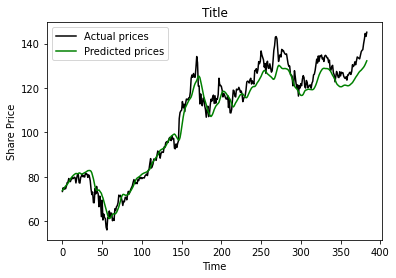

In [8]:
# Plot the test predictions
plt.plot(actual_prices, color='black',label='Actual prices')
plt.plot(predicted_prices, color='green', label='Predicted prices')
plt.title('Title')
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.show()

In [9]:
# Predict next day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), :]]
real_data = np.array(real_data)
# real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(np.tile(prediction, (1, 2)))[:, 0]
print("Prediction: ")
print(prediction)

Prediction: 
[132.96877]
